In [1]:
%matplotlib inline

import pandas as pd
from shapely.geometry import Point, Polygon
import pysal as ps
import geopandas as gpd
from access import access, weights
import numpy as np
import matplotlib.pyplot as pat

In [2]:
# Pull data from repo and check to make sure it appears

rivpop = gpd.read_file('https://raw.githubusercontent.com/preetijuturu/riversidecitycovidtests/master/rivpop.geojson')
rivpop.head()

,OBJECTID_1,OBJECTID,NAME10,POPULATION,SHAPESTAre,SHAPESTLen,GEO_ID,LSAD,CENSUSAREA,SHAPE_Leng,PERIMETER,WARD_NUMB,PERSON,geometry
0,1,605,Block 1003,123,440218.980469,3654.141563,1500000US060650422131,BG,0.299,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.31809 33.98658, -117.31809 33.9..."
1,2,606,Block 1002,58,473848.378906,3224.484694,1500000US060650422081,BG,0.337,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.34386 33.94835, -117.34372 33.9..."
2,3,607,Block 2009,126,724615.970703,4729.727885,1500000US060650306013,BG,2.137,1.060373,143554.533063,2,ANDY MELENDREZ,"MULTIPOLYGON (((-117.34961 33.93316, -117.3483..."
3,4,607,Block 2009,126,724615.970703,4729.727885,1500000US060650422071,BG,0.410,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.34833 33.93169, -117.34773 33.9..."
4,5,607,Block 2009,126,724615.970703,4729.727885,1500000US060650422082,BG,0.406,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.34828 33.93691, -117.34827 33.9..."


,OBJECTID_1,OBJECTID,NAME10,POPULATION,SHAPESTAre,SHAPESTLen,GEO_ID,LSAD,CENSUSAREA,SHAPE_Leng,PERIMETER,WARD_NUMB,PERSON,geometry
0,1,605,Block 1003,123,440218.980469,3654.141563,1500000US060650422131,BG,0.299,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.31809 33.98658, -117.31809 33.9..."
1,2,606,Block 1002,58,473848.378906,3224.484694,1500000US060650422081,BG,0.337,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.34386 33.94835, -117.34372 33.9..."
2,3,607,Block 2009,126,724615.970703,4729.727885,1500000US060650306013,BG,2.137,1.060373,143554.533063,2,ANDY MELENDREZ,"MULTIPOLYGON (((-117.34961 33.93316, -117.3483..."
3,4,607,Block 2009,126,724615.970703,4729.727885,1500000US060650422071,BG,0.410,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.34833 33.93169, -117.34773 33.9..."
4,5,607,Block 2009,126,724615.970703,4729.727885,1500000US060650422082,BG,0.406,1.060373,143554.533063,2,ANDY MELENDREZ,"POLYGON ((-117.34828 33.93691, -117.34827 33.9..."


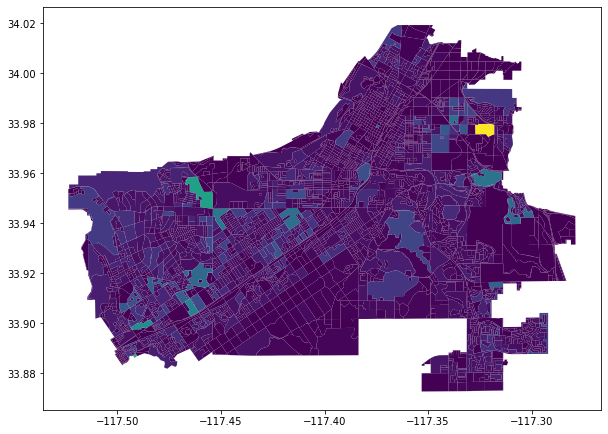

In [3]:
# Show population data per block group in map

rivpop.plot(column='POPULATION', figsize=(10,10))
rivpop.head()


In [4]:
testing_sites = pd.read_csv('https://raw.githubusercontent.com/preetijuturu/riversidecitycovidtests/master/City%20of%20Riverside%20COVID-19%20Testing%20Sites%20-%20Sheet3.csv')
testing_sites.head()

,ADDRESS,NAME,COORD_X,COORD_Y
0,"3900 Main Street Riverside, CA 92522",Curative Testing Kiosk,33.980815,-117.374730
1,"2933 University Ave, Riverside, CA 92507-4243",University Community Health Center,33.978015,-117.364108
2,"3900 Main St., Riverside, CA 92501",Riverside City Hall Kiosk,33.980807,-117.375149
3,"4261 Park Ave Riverside, Ca 92507",OptumServe Testing Site at Lincoln Park Commun...,33.973132,-117.367312
4,"4646 Brockton Ave Ste 102, Riverside, CA 92506",Quest Diagnostics - Riverside 4646 Brockton,33.975884,-117.385184


In [5]:
testing_sites_geom = gpd.GeoDataFrame(testing_sites, geometry = gpd.points_from_xy(testing_sites.COORD_X, testing_sites.COORD_Y))
testing_sites_geom.head()

,ADDRESS,NAME,COORD_X,COORD_Y,geometry
0,"3900 Main Street Riverside, CA 92522",Curative Testing Kiosk,33.980815,-117.374730,POINT (33.981 -117.375)
1,"2933 University Ave, Riverside, CA 92507-4243",University Community Health Center,33.978015,-117.364108,POINT (33.978 -117.364)
2,"3900 Main St., Riverside, CA 92501",Riverside City Hall Kiosk,33.980807,-117.375149,POINT (33.981 -117.375)
3,"4261 Park Ave Riverside, Ca 92507",OptumServe Testing Site at Lincoln Park Commun...,33.973132,-117.367312,POINT (33.973 -117.367)
4,"4646 Brockton Ave Ste 102, Riverside, CA 92506",Quest Diagnostics - Riverside 4646 Brockton,33.975884,-117.385184,POINT (33.976 -117.385)


In [6]:
# testing_sites_geom.crs = 'EPSG:4326'
# testing_sites_geom = testing_sites_geom.to_crs('EPSG:26946')

testing_sites_geom.crs = 'epsg:4326'
testing_sites_geom = testing_sites_geom.to_crs(epsg=26946)

In [7]:
# base = rivpop.plot(figsize=(10,10))
# testing_sites_geom.plot(ax=base, color='yellow', markersize = 5, figsize=(10,10))

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/preetijuturu/riversidecitycovidtests/master/City%20of%20Riverside%20COVID-19%20Testing%20Sites%20-%20Sheet3.csv')
crs = {'init':'epsg:4326'}
df.head()

,ADDRESS,NAME,COORD_X,COORD_Y
0,"3900 Main Street Riverside, CA 92522",Curative Testing Kiosk,33.980815,-117.374730
1,"2933 University Ave, Riverside, CA 92507-4243",University Community Health Center,33.978015,-117.364108
2,"3900 Main St., Riverside, CA 92501",Riverside City Hall Kiosk,33.980807,-117.375149
3,"4261 Park Ave Riverside, Ca 92507",OptumServe Testing Site at Lincoln Park Commun...,33.973132,-117.367312
4,"4646 Brockton Ave Ste 102, Riverside, CA 92506",Quest Diagnostics - Riverside 4646 Brockton,33.975884,-117.385184


In [16]:
geometry = [Point(xy) for xy in zip(df["COORD_Y"],df["COORD_X"])]
geometry[:3]

In [17]:
geo_df = gpd.GeoDataFrame(df,crs = crs,geometry = geometry)
geo_df.head()

/home/andrew/anaconda3/envs/employment/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,ADDRESS,NAME,COORD_X,COORD_Y,geometry
0,"3900 Main Street Riverside, CA 92522",Curative Testing Kiosk,33.980815,-117.374730,POINT (-117.37473 33.98082)
1,"2933 University Ave, Riverside, CA 92507-4243",University Community Health Center,33.978015,-117.364108,POINT (-117.36411 33.97802)
2,"3900 Main St., Riverside, CA 92501",Riverside City Hall Kiosk,33.980807,-117.375149,POINT (-117.37515 33.98081)
3,"4261 Park Ave Riverside, Ca 92507",OptumServe Testing Site at Lincoln Park Commun...,33.973132,-117.367312,POINT (-117.36731 33.97313)
4,"4646 Brockton Ave Ste 102, Riverside, CA 92506",Quest Diagnostics - Riverside 4646 Brockton,33.975884,-117.385184,POINT (-117.38518 33.97588)


<AxesSubplot:>

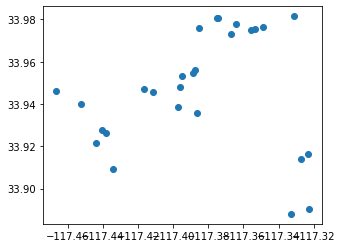

In [18]:
geo_df.plot()

<AxesSubplot:>

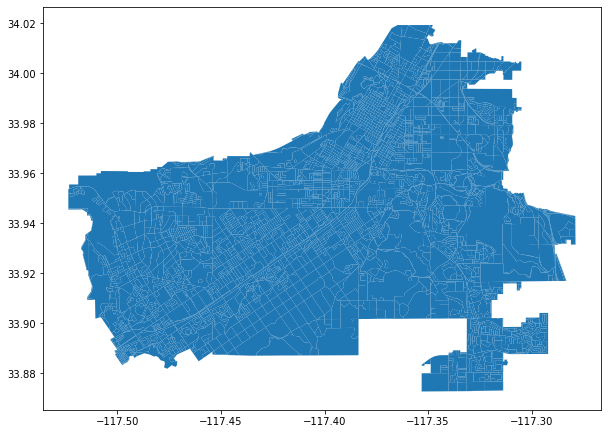

In [19]:
rivpop.plot(figsize=(10,10))

<AxesSubplot:>

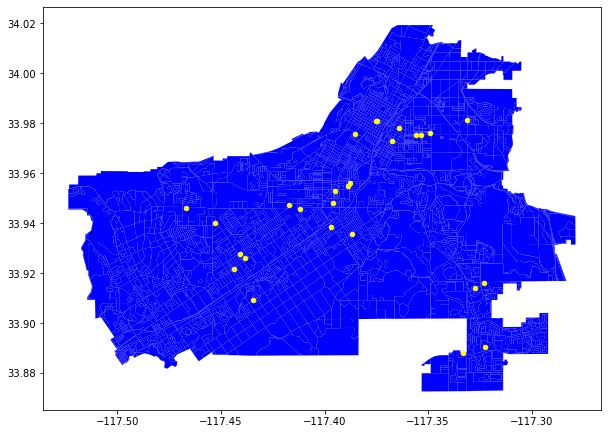

In [20]:
fig, ax = pat.subplots(figsize=(10,10))
rivpop.plot(ax=ax, color='blue', markersize = 5, figsize=(10,10))
geo_df.plot(ax=ax, color='yellow', markersize = 20)